#Machine Learning Course Assignment#

*Prof: Ladle Patel*

*Student: Pietro Barizza*

*Case study 2: IBM HR Analytics Employee Attrition & Performance*

*Objective*

You are an HR analyst. Your goal is to predict whether an employee is likely to leave the
company using historical HR data. You’ll compare two classification models:
* Logistic Regression
* Decision Tree Classifier

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Load the dataset and display the first 5 rows.

In [2]:
# load dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/assignment/IBMHR_Data.csv')

In [3]:
# explore the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Q2. What are the key features in this dataset?

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15  JobRole                   1470 non-null   object
 16  JobSatisfaction           1470 non-null   int64
 17  MaritalStatus             1470 non-null   object
 18  MonthlyIncome             1470 non-null   int64
 19  MonthlyRate               1470 non-null   int64
 20  NumCompaniesWorked        1470 non-null   int64
 21  Over18                    1470 non-null   object
 22  OverTime                  1470 non-null   object
 23  PercentSalaryHike         1470 non-null   int64
 24  PerformanceRating         1470 non-null   int64
 25  RelationshipSatisfaction  1470 non-null   int64
 26  StandardHours             1470 non-null   int64
 27  StockOptionLevel          1470 non-null   int64
 28  TotalWorkingYears         1470 non-null   int64
 29  TrainingTimesLastYear     1470 non-null   int64
 30  WorkLifeBalance           1470 non-null   int64
 31  YearsAtCompany            1470 non-null   int64
 32  YearsInCurrentRole        1470 non-null   int64
 33  YearsSinceLastPromotion   1470 non-null   int64
 34  YearsWithCurrManager      1470 non-null   int64
dtypes: int64(26), object(9)
memory usage: 402.1+ KB

[25]
0s
for i, col in enumerate(df.columns):
    print(f"* {i:>2}: {col:<30} -->")
*  0: Age                            --> significative
*  1: Attrition                      --> TARGET VARIABLE
*  2: BusinessTravel                 --> less significative
*  3: DailyRate                      --> significative
*  4: Department                     --> significative
*  5: DistanceFromHome               --> significative
*  6: Education                      --> significative
*  7: EducationField                 --> significative
*  8: EmployeeCount                  --> not significative
*  9: EmployeeNumber                 --> not significative
* 10: EnvironmentSatisfaction        --> highly significative
* 11: Gender                         --> significative
* 12: HourlyRate                     --> significative
* 13: JobInvolvement                 --> significative
* 14: JobLevel                       --> significative
* 15: JobRole                        --> significative
* 16: JobSatisfaction                --> highly significative
* 17: MaritalStatus                  --> significative
* 18: MonthlyIncome                  --> highly significative
* 19: MonthlyRate                    --> significative
* 20: NumCompaniesWorked             --> significative
* 21: Over18                         --> not significative
* 22: OverTime                       --> highly significative
* 23: PercentSalaryHike              --> significative
* 24: PerformanceRating              --> significative
* 25: RelationshipSatisfaction       --> significative
* 26: StandardHours                  --> not significative
* 27: StockOptionLevel               --> significative
* 28: TotalWorkingYears              --> significative
* 29: TrainingTimesLastYear          --> significative
* 30: WorkLifeBalance                --> significative
* 31: YearsAtCompany                 --> significative
* 32: YearsInCurrentRole             --> significative
* 33: YearsSinceLastPromotion        --> significative
* 34: YearsWithCurrManager           --> significative

Overall we can say that OverTime, MontlyIncome, JobSatisfaction, EnvironmentSatisfaction are key feature driving Attrition. We expect their coefficients to be dominant. DistanceFromHome, YearsAtCompany and Age come after, all the rest we expect to contribute in lesser part.

Q3. What is the target variable? What are its possible values?

In [7]:
# count the unique value of Attrition
df['Attrition'].unique()
# alternatively
#df['Attrition'].value_counts()

array(['Yes', 'No'], dtype=object)

The target variaable is 'Attrition' and has only 2 possible values: 'Yes' or 'No', since this is a binary classification.
Attrition = 'No' --> the employee is unhappy
Attrition = 'Yes' --> the employee is happy

Q4. How many employees left the company vs stayed? (Use value counts on the target variable.)

In [8]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


237 emploees left and 1233 remains.

Q5. Check for missing values. Are there any?

In [9]:
# checking for missing values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


The dataset seems to be complete. no missing values

Q6. Convert categorical columns (like Attrition, Gender, Department, etc.) into numeric form. What encoding method will you use?

In [10]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [11]:
# get the non numerical features
for col in df.columns:
    if df[col].dtype != 'int64':
        print(f"{col}: {df[col].dtype}")

Attrition: object
BusinessTravel: object
Department: object
EducationField: object
Gender: object
JobRole: object
MaritalStatus: object
Over18: object
OverTime: object


In [12]:
# get the unique values for each of the not numerical features
for col in df.columns:
    if df[col].dtype != 'int64':
        print(f'{col:30}: {df[col].unique()}')

Attrition                     : ['Yes' 'No']
BusinessTravel                : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department                    : ['Sales' 'Research & Development' 'Human Resources']
EducationField                : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender                        : ['Female' 'Male']
JobRole                       : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus                 : ['Single' 'Married' 'Divorced']
Over18                        : ['Y']
OverTime                      : ['Yes' 'No']


The following are binary features.
We use Label Encoding: replace with 0,1 using a map() or replace({'No': 0, 'Yes': 1}) / replace({'Female': 0, 'Male': 1, })
* Attrition
* Gender
* Over18       -->  technically we caould drop this column since it is all 'Y'                 
* OverTime

The remaning feature are multi-categorical.
We use One-Hot Encoding with get_dummies() with drop_first=True to avoid multicollinearity


In [13]:
# label encoding
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

/tmp/ipython-input-4090456428.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-4090456428.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-4090456428.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

In [14]:
# one-hot encoding
df = pd.get_dummies(df, columns=[
    'BusinessTravel',
    'Department',
    'EducationField',
    'JobRole',
    'MaritalStatus'
], drop_first=True)

In [15]:
# drop this colun since not signicative
#df = df.drop('Over18', axis=1)
# see below, question 7

In [16]:
# check if all features are numeric / boolean
df.dtypes

,0
Age,int64
Attrition,int64
DailyRate,int64
DistanceFromHome,int64
Education,int64
EmployeeCount,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64
Gender,int64
HourlyRate,int64


Q7. Drop irrelevant columns like EmployeeNumber, Over18, and EmployeeCount. Why?

In [17]:
# drop not signicative features
df = df.drop('EmployeeNumber', axis=1)
df = df.drop('EmployeeCount', axis=1)
df = df.drop('Over18', axis=1)

These three features are not significative. EmployeeNumber since an ID, EmployeeCount a count and Over18 since all values are the same 'Y'

Q8. Select meaningful features for prediction (at least 8–10). Which ones did you choose and why?

In [18]:
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single']

I have chosen all of them, since all contribute with different weights to a better accuracy

Q9. Split the dataset into feature matrix X and target variable y

In [19]:
# extract features and target
# Attrition is our target
X = df[features]
y = df['Attrition']
X.sample(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
73,32,548,1,3,2,1,66,3,2,2,...,False,False,False,False,False,True,False,False,True,False
800,28,1009,1,3,1,1,45,2,1,2,...,False,True,False,False,False,False,False,False,False,False
920,34,135,19,3,3,0,46,3,2,2,...,False,True,False,False,False,False,False,False,False,False
1085,31,561,3,3,4,0,33,3,1,3,...,False,False,False,False,False,True,False,False,False,True
17,22,1123,16,2,4,1,96,4,1,4,...,False,True,False,False,False,False,False,False,False,False


In [20]:
y.sample(5)

,Attrition
1087,0
933,0
216,1
49,0
1327,0


Q10. Perform train-test split (e.g., 80% training, 20% testing).

In [21]:
# train-test split at 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# check the shape
X_train.shape

(1176, 45)

In [23]:
 X_test.shape

(294, 45)

In [24]:
y_train.shape

(1176,)

In [25]:
y_test.shape

(294,)

Q11. Apply feature scaling using StandardScaler. Why is this important for Logistic Regression?

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-1.38855944, -1.10813858,  1.44039645, ..., -0.26099788,
        -0.93733358, -0.66288195],
       [-2.04073779, -1.2634814 , -0.52269928, ..., -0.26099788,
        -0.93733358,  1.50856422],
       [-0.84507748,  1.10364737,  1.31770296, ..., -0.26099788,
        -0.93733358, -0.66288195],
       ...,
       [-1.60595222,  1.1258392 , -0.76808624, ..., -0.26099788,
         1.06685604, -0.66288195],
       [-0.84507748,  1.42666182,  0.45884859, ..., -0.26099788,
         1.06685604, -0.66288195],
       [ 1.43754676, -1.32019386, -0.03192534, ..., -0.26099788,
         1.06685604, -0.66288195]])

In [28]:
X_test_scaled

array([[-0.95377387,  0.16419314, -0.52269928, ..., -0.26099788,
        -0.93733358,  1.50856422],
       [ 1.76363593,  0.70172863,  0.45884859, ..., -0.26099788,
        -0.93733358, -0.66288195],
       [-1.38855944, -1.37937208,  1.56308993, ..., -0.26099788,
         1.06685604, -0.66288195],
       ...,
       [ 1.43754676,  1.28857931,  2.29925083, ..., -0.26099788,
         1.06685604, -0.66288195],
       [ 0.02449366,  1.04940067,  0.09076814, ..., -0.26099788,
        -0.93733358,  1.50856422],
       [ 1.11145758, -1.35718025, -0.89077972, ..., -0.26099788,
         1.06685604, -0.66288195]])

Scaling is important since the different features are measure in different unit of measurement, but sklearn (and in general any algorithm) is not aware of the unit. additionally features should be comparable, otherwise the gradients vanish or explode

#Modeling & Evaluation#

Q12. Train a Logistic Regression model and make predictions.


In [29]:
# Logistic regresson
from sklearn.linear_model import LogisticRegression


# training
# note, since the target is categorical, no need to scale the target
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# predict on the test split
y_pred_lr = log_reg.predict(X_test_scaled)

y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Q13. Train a Decision Tree Classifier with a max_depth=4 and make predictions.

In [30]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# training
# note Decision tree works on Gini inpurity or Cross Entropy, not on gradients
# so no need of scaling the data
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train, y_train)

# predict on the test split
y_pred_dt = dt_clf.predict(X_test)

y_pred_dt

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
results_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred_lr': y_pred_lr,
    'y_pred_dt': y_pred_dt,
    'lr_correct': y_pred_lr == y_test,
    'dt_correct': y_pred_dt == y_test
})

results_df.head()

,y_test,y_pred_lr,y_pred_dt,lr_correct,dt_correct
1041,0,0,0,True,True
184,0,0,0,True,True
1222,1,0,1,False,True
67,0,0,0,True,True
220,0,0,0,True,True


Q14. Evaluate both models using:
* Accuracy
* Confusion Matrix
* Precision, Recall, F1 Score
* ROC AUC Score
Which model performs better overall?

In [32]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# evaluate Logistic Regression
print('\nLogist Regression')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))
print('\nClassification Report:\n', classification_report(y_test, y_pred_lr))
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba_lr))

print('\nDecision Tree')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('\nClassification Report:\n', classification_report(y_test, y_pred_dt))
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba_dt))



Logist Regression
Accuracy: 0.8775510204081632

Confusion Matrix:
 [[241  14]
 [ 22  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294

ROC AUC Score: 0.7902463549522373

Decision Tree
Accuracy: 0.8537414965986394

Confusion Matrix:
 [[249   6]
 [ 37   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.25      0.05      0.09        39

    accuracy                           0.85       294
   macro avg       0.56      0.51      0.50       294
weighted avg       0.79      0.85      0.81       294

ROC AUC Score: 0.6388637506284565


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Logistic Regression metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

# Decision Tree metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

# tabular format for better comparison
metrics_df = pd.DataFrame({
    'Accuracy': [lr_accuracy, dt_accuracy],
    'Precision': [lr_precision, dt_precision],
    'Recall': [lr_recall, dt_recall],
    'F1 Score': [lr_f1, dt_f1],
    'ROC AUC Score': [lr_roc_auc, dt_roc_auc]
}, index=['Logistic Regression', 'Decision Tree'])

metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Logistic Regression,0.877551,0.548387,0.435897,0.485714,0.790246
Decision Tree,0.853741,0.250000,0.051282,0.085106,0.638864


**Results**:

*   **Accuracy:** Logistic Regression accuracy (0.878) > Decision Tree accuragy (0.854). LR performed better

*   **Precision:** Logistic Regression precision (0.548) >> Decision Tree precision (0.250). igher precision is important when minimizing false positives is crucial

*   **Recall (for class 1 - Attrition 'Yes'):** Logistic Regressionrecall (0.436) >> Decision Tree recall (0.051). Higher recall is important when minimizing false negatives is crucial (fail to identify an employee who is likely to leave).

*   **F1 Score (for class 1 - Attrition 'Yes'):** Logistic Regression F1 Score (0.486) >> Decision Tree F1 score (0.085). This means overall performance ofr Logistinc Regression in predicting.

*   **ROC AUC Score:** Logistic Regression ROC AUC Score (0.790) > Decision Tree ROC AUC Score (0.639).  Logistic Regssion better discriminates


**Logistic Regression model performs significantly better** than the Decision Tree.

#Visual Analysis#

Q15. Plot the confusion matrix for both models. What do they tell you?


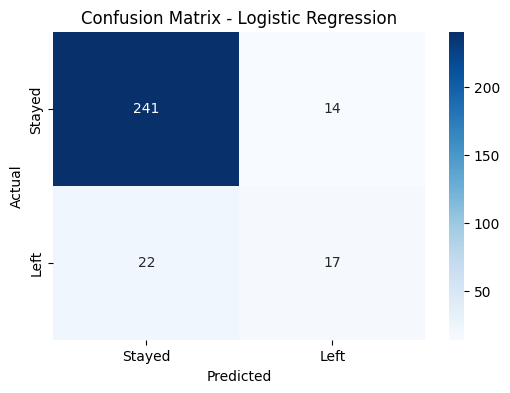

In [34]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



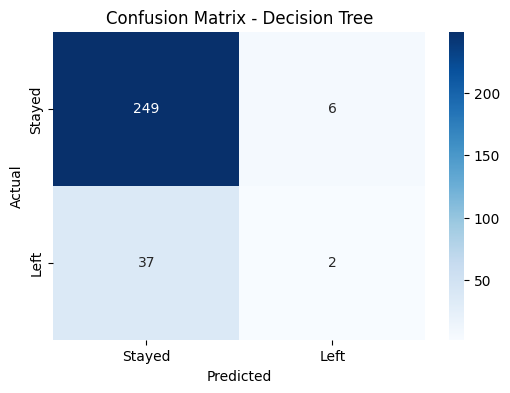

In [35]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* **Logistic Regression:**
    *   TN: 241  staying employees
    *   FP: 14 predicted as leaving when they stay
    *   FN: 22 predicted as staying when they left
    *   TP: 17 employees leaving.

* **Decision Tree:**
    *   TN: 249  staying employees
    *   FP: 6 predicted as leaving when they stay
    *   FN: 37 predicted as staying when they left
    *   TP: 2 employees leaving.


**Conclusion:**

Logistic Regression model is better at identifying employees who are likely to leave (high TP and low FN)

The Decision Tree has a very high number of FN, meaning it misses employees who actually leave.

Q16. Plot the ROC Curve for both models. Which has a better AUC?

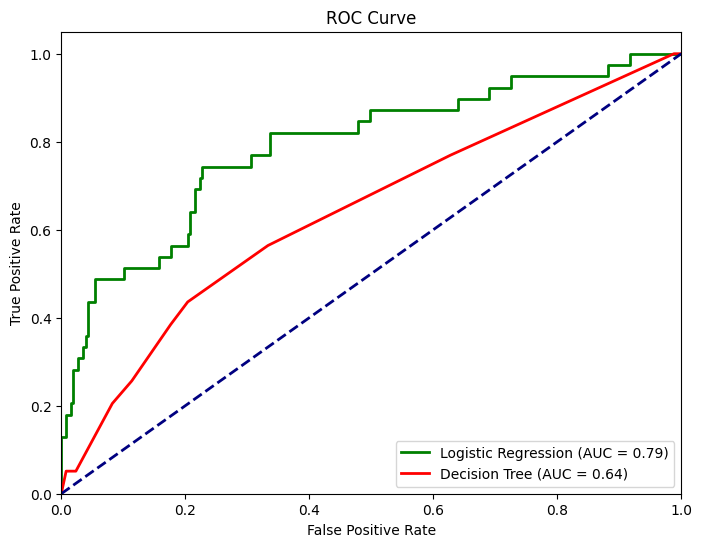

In [36]:
from sklearn.metrics import roc_curve, auc

# logistic regression ROC/AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# decision tree ROC/AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

*   **Logistic Regression AUC = 0.79**
*   **Decision Tree AUC = 0.64**

The **Logistic Regression model has a better AUC** (0.79) compared to the Decision Tree model (0.64).
This means that Logistic Regression has an higher ability to distinguish between FP and TP

#Interpretation#

Q17. What are the most important features in predicting attrition (use .coef_ for Logistic, .feature_importances_ for Decision Tree)?

In [37]:
# print LR coefficients
log_reg.coef_

array([[-0.24425304, -0.11215274,  0.33897065,  0.0655529 , -0.41264521,
         0.21970197,  0.03437246, -0.3397343 , -0.11592217, -0.43343367,
         0.19331046,  0.09274038,  0.50973607,  0.97532423, -0.05298426,
        -0.02093863, -0.17088165,  0.        , -0.17451771, -0.46254511,
        -0.20679053, -0.25551851,  0.66828929, -0.6411882 ,  0.50086025,
        -0.46278944,  0.71795027,  0.44124644,  0.04874583,  0.27799414,
        -0.29178301, -0.0917678 , -0.25640125, -0.12713119,  0.12758327,
         0.35656346,  0.78080822,  0.02470355,  0.16206668, -0.27356239,
         0.39899912,  0.3868612 ,  0.50654195,  0.2092989 ,  0.62552417]])

In [38]:
# print DT features
dt_clf.feature_importances_

array([0.01618573, 0.09187747, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03028768, 0.03272003,
       0.23526735, 0.        , 0.        , 0.23138504, 0.        ,
       0.        , 0.        , 0.        , 0.02595767, 0.07930268,
       0.        , 0.        , 0.02746289, 0.04410271, 0.04398693,
       0.        , 0.04058628, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01561971, 0.        , 0.        , 0.        , 0.08525782])

In [42]:
# LR: flatten the array into a series and order by absolute value descending
coef = pd.Series(log_reg.coef_[0], index=X.columns)
coef = coef.abs().sort_values(ascending=False)
print('Logistic Regression coefficients:')
coef.head(10)


Logistic Regression coefficients:


,0
OverTime,0.975324
JobRole_Laboratory Technician,0.780808
BusinessTravel_Travel_Frequently,0.717950
YearsAtCompany,0.668289
YearsInCurrentRole,0.641188
MaritalStatus_Single,0.625524
NumCompaniesWorked,0.509736
JobRole_Sales Representative,0.506542
YearsSinceLastPromotion,0.500860
YearsWithCurrManager,0.462789


In [43]:
# DT: flatten the array into a series and order by value descending
fea_imp = pd.Series(dt_clf.feature_importances_, index=X.columns)
fea_imp = fea_imp.sort_values(ascending=False)
print('Decision Tree')
fea_imp.head(10)

Decision Tree


,0
MonthlyIncome,0.235267
OverTime,0.231385
DailyRate,0.091877
MaritalStatus_Single,0.085258
TotalWorkingYears,0.079303
YearsInCurrentRole,0.044103
YearsSinceLastPromotion,0.043987
BusinessTravel_Travel_Frequently,0.040586
JobSatisfaction,0.032720
JobLevel,0.030288


Q18. What does the Logistic Regression model tell you about the odds of attrition for certain features like OverTime or JobSatisfaction?

In [ ]:
coef[['JobSatisfaction', 'OverTime']]

* JobSatisfaction is negative, means that the more it increase the more descrease the probability the employee leave

* OverTime has a large positive number which means the more the OverTime increase the more the employee leave

Q19. What business insights can HR managers gain from this model?

The analysis tells the HR manager that he should consider the key drivers for attrition:
* OverTime, MonthlyIncome, JobLevel JobRole_Laboratory_Technician	 and BusinessTravel_Travel_Frequently
* take actions to reduce OverTime
* implement a retention policy
* concentrate on some roles like Technicial
* and work on a policy for frequent business traveller employees

Q20. Suggest 2-3 ways the company could reduce attrition based on your findings.

The company should focus on the follogin key aspects:
1. reduce Overtime

2. increase compensation (or at least align to the competitor average

3. work on the job satisfaction, especially for the tehcnical roles and the frequent business traveller.